<a href="https://colab.research.google.com/github/AnasBakr/Ml-projects-/blob/main/Car_Price_Prediction_using_RandomForestRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor

Data Collection and Processing

In [ ]:
# loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('/content/CAR DETAILS FROM CAR DEKHO.csv')

In [ ]:
#see the first 5 rows of the dataset
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
#the number of rows and columns
car_dataset.shape

(4340, 8)

In [ ]:
#info about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
#count of null rows
car_dataset.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [ ]:
car_dataset.duplicated().sum()


0

In [ ]:
car_dataset = car_dataset.drop_duplicates()
len(car_dataset)

3577

In [ ]:
#the count of types of categoril data
data = {
    'fuel': car_dataset['fuel'].value_counts(),
    'seller_type': car_dataset['seller_type'].value_counts(),
    'transmission': car_dataset['transmission'].value_counts(),
    'owner': car_dataset['owner'].value_counts(),
}

In [ ]:
#extract a more useful feture from the fetures
Age = []
for i in car_dataset['year'] :
  Age.append(2023 - i )
car_dataset.insert(2 ,'Age' ,Age )
car_dataset.drop(columns=['name' ,'year' ] ,inplace=True )

Encoding the Categorical Data

In [ ]:
#replacing the categories with numbers
le = preprocessing.LabelEncoder()
categorical_attr = ['fuel', 'seller_type', 'transmission' ,'owner' ]
car_dataset[categorical_attr] = car_dataset[categorical_attr].apply(le.fit_transform, axis=0)

In [ ]:
car_dataset.head()

,Age,selling_price,km_driven,fuel,seller_type,transmission,owner
0,16,60000,70000,4,1,1,0
1,16,135000,50000,4,1,1,0
2,11,600000,100000,1,1,1,0
3,6,250000,46000,4,1,1,0
4,9,450000,141000,1,1,1,2


In [ ]:
car_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3577.0,10.037462,4.251759,3.0,7.0,10.0,13.0,31.0
selling_price,3577.0,473912.542074,509301.809816,20000.0,200000.0,350000.0,600000.0,8900000.0
km_driven,3577.0,69250.545709,47579.940016,1.0,36000.0,60000.0,90000.0,806599.0
fuel,3577.0,2.442270,1.508582,0.0,1.0,1.0,4.0,4.0
seller_type,3577.0,0.810176,0.415078,0.0,1.0,1.0,1.0,2.0
transmission,3577.0,0.912776,0.282202,0.0,1.0,1.0,1.0,1.0
owner,3577.0,0.905228,1.277152,0.0,0.0,0.0,2.0,4.0


Data Visualization

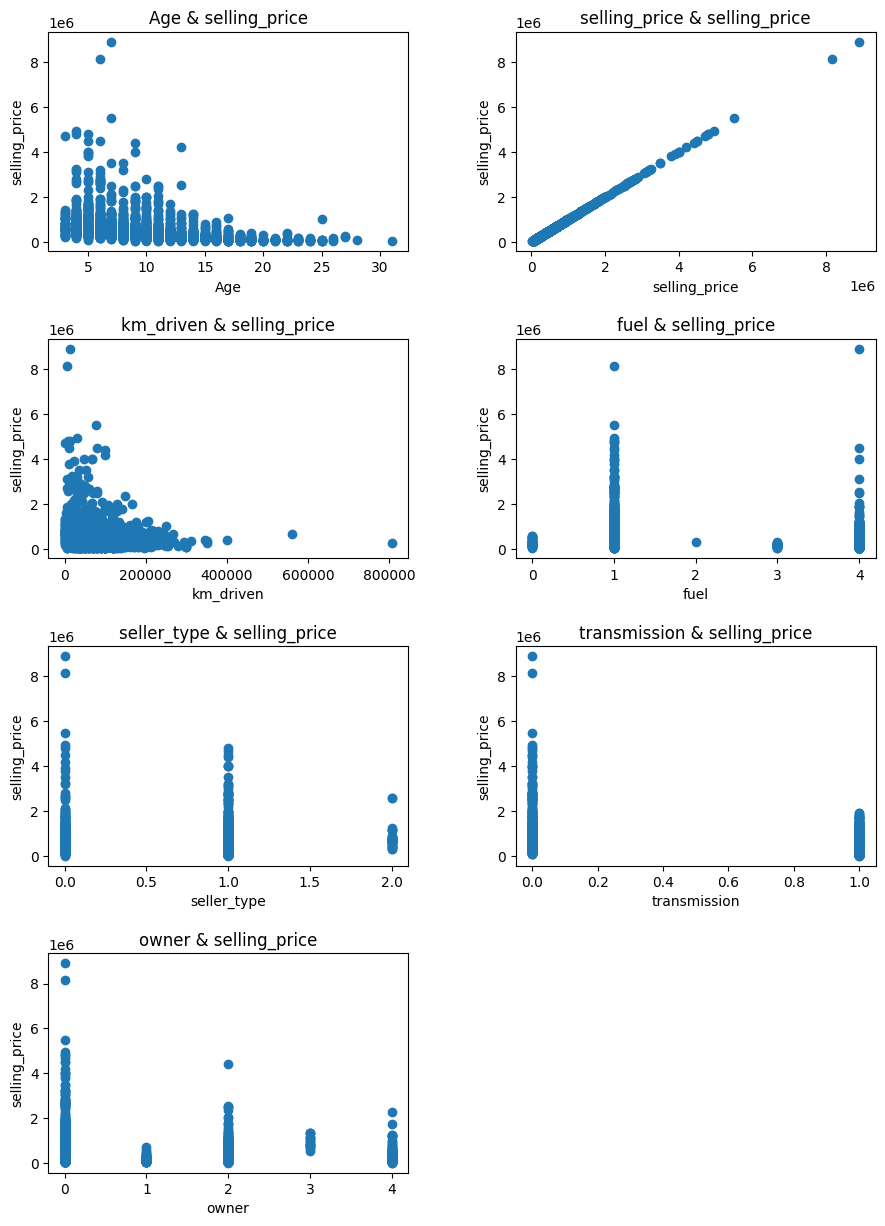

In [ ]:
variables = ['Age' ,'selling_price' ,'km_driven' ,'fuel' ,'seller_type' ,'transmission' ,'owner' ]
num_plots = len(variables)
num_rows = 4
num_cols = 2
fig, axs = plt.subplots(num_rows, num_cols, figsize=(9, 12))
fig.tight_layout()
for i, var in enumerate(variables):
    row = i // num_cols
    col = i % num_cols
    axs[row, col].scatter(car_dataset[var], car_dataset['selling_price'])
    axs[row, col].set_xlabel(var)
    axs[row, col].set_ylabel('selling_price')
    axs[row, col].set_title(f'{var} & selling_price')
for i in range(num_plots, num_rows * num_cols):
   fig.delaxes(axs.flatten()[i])
plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.show()

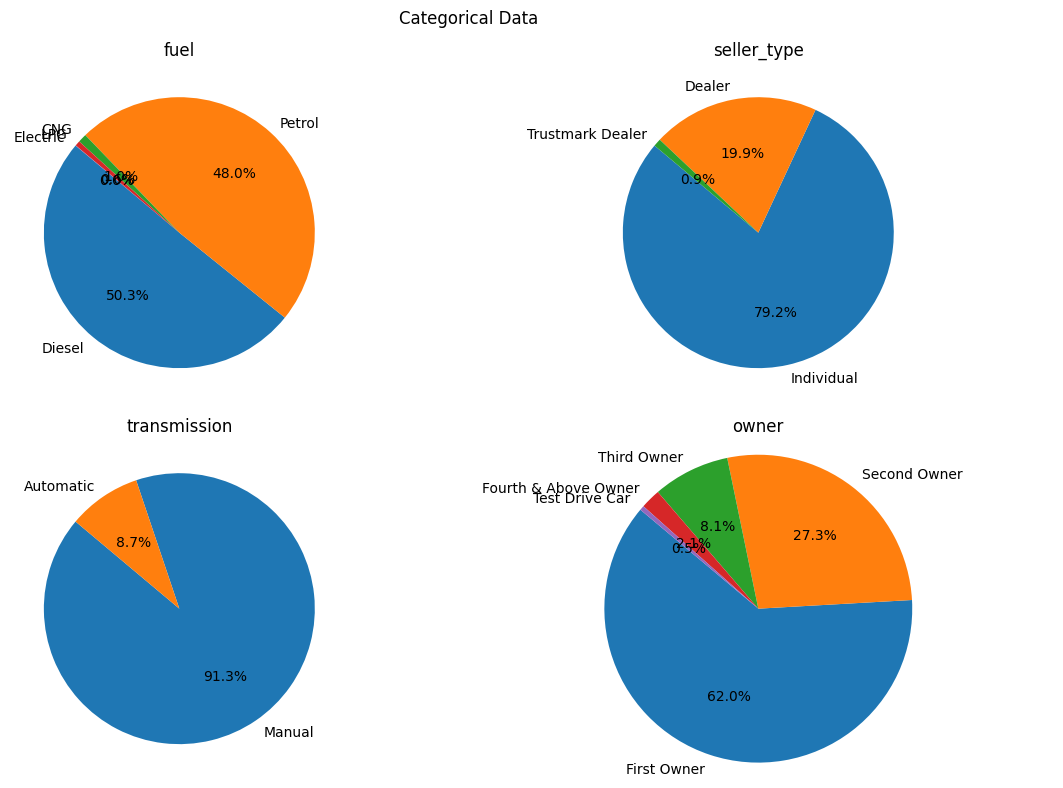

In [ ]:
#Pie Charts for Categorical Data
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Categorical Data')
for i, (column_name, values_array) in enumerate(data.items()):
    row = i // 2
    col = i % 2
    categories = list(values_array.index)
    values = list(values_array)
    axs[row, col].pie(values, labels=categories, autopct='%1.1f%%', startangle=140)
    axs[row, col].set_title(column_name)
plt.axis('equal')
plt.tight_layout()
plt.show()

(array([  56,   57,  184,  212,  310,  380,  487,  510,  581,  744,  962,
        977, 1101, 1111, 1271, 1283, 1497, 1502, 1508, 1715, 1968, 2057,
       2064, 2065, 2264, 2329, 2416, 2489, 2495, 2498, 2663, 2875, 2889,
       2898, 2955, 2965, 2994, 3033, 3087, 3091, 3123, 3138, 3183, 3188,
       3279, 3351, 3353, 3366, 3425, 3495, 3517, 3532, 3543]),)


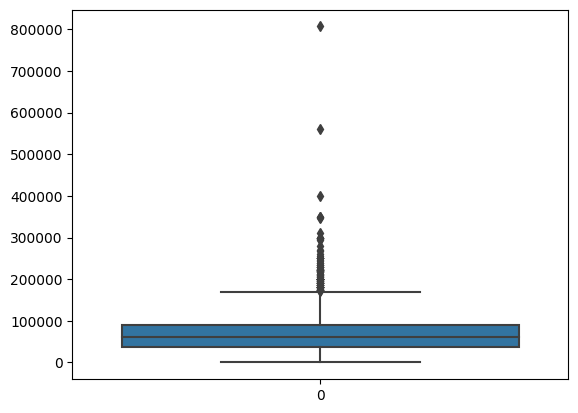

In [ ]:
sns.boxplot(car_dataset['km_driven'])
print(np.where(car_dataset['km_driven']>200000))

seeeing the best test size

In [ ]:
x = car_dataset.drop('selling_price' ,axis=1)
y = car_dataset['selling_price']

In [ ]:
test_sizes = [0.1, 0.15, 0.2, 0.25, 0.3]
results_df = pd.DataFrame(columns=['Test Size', 'MAE', 'MSE', 'RMSE', 'R2 Score'])

for test_size in test_sizes:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=0)
    regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)
    regressor.fit(x_train, y_train)
    y_pred = regressor.predict(x_test)

    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2_score = metrics.r2_score(y_test, y_pred)
    results_df = results_df.append({
        'Test Size': test_size,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2 Score': r2_score
    } ,ignore_index=True )
print(results_df)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
<ipython-input-23-acaf04a372cc>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
<ipython-input-23-acaf04a372cc>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


   Test Size            MAE           MSE           RMSE  R2 Score
0       0.10  188769.471361  1.211739e+11  348100.354312  0.346964
1       0.15  187704.699877  1.267081e+11  355960.792125  0.436889
2       0.20  182080.798287  1.107066e+11  332726.029098  0.459678
3       0.25  192391.496414  1.393196e+11  373255.436197  0.361466
4       0.30  195125.556836  1.570866e+11  396341.532286  0.430001


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
<ipython-input-23-acaf04a372cc>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
<ipython-input-23-acaf04a372cc>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used 

Splitting the data and Target

In [ ]:
X = car_dataset.drop('selling_price' ,axis=1)
Y = car_dataset['selling_price']

In [ ]:
print(X)

      Age  km_driven  fuel  seller_type  transmission  owner
0      16      70000     4            1             1      0
1      16      50000     4            1             1      0
2      11     100000     1            1             1      0
3       6      46000     4            1             1      0
4       9     141000     1            1             1      2
...   ...        ...   ...          ...           ...    ...
4335    9      80000     1            1             1      2
4336    9      80000     1            1             1      2
4337   14      83000     4            1             1      2
4338    7      90000     1            1             1      0
4339    7      40000     4            1             1      0

[3577 rows x 6 columns]


In [ ]:
print(Y)

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 3577, dtype: int64


Splitting Training and Test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model Training

1-RandomForestRegressor

In [ ]:
# loading the RandomForestRegressor model
lin_reg_model = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

In [ ]:
#traing the data
lin_reg_model.fit(X_train ,Y_train )

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestRegressor(n_estimators=10, oob_score=True, random_state=0)

# Model Evaluation

In [ ]:
#testing in the traning data
training_data_prediction = lin_reg_model.predict(X_train)

In [ ]:
#seeing the r^^2 error
error_score = metrics.r2_score(Y_train ,training_data_prediction )
print("R squared Error : ", error_score)

R squared Error :  0.8479778372186964


Visualize the actual prices and Predicted prices

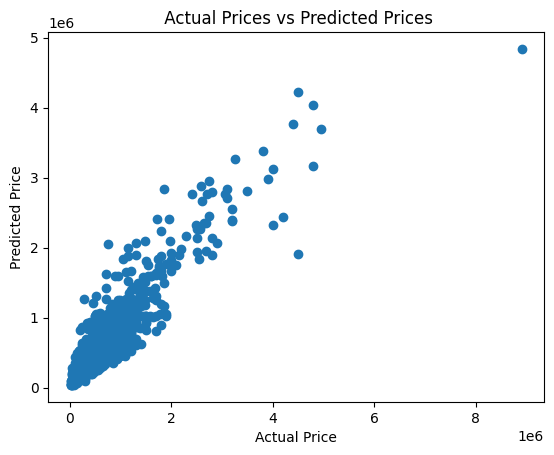

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
# prediction on Training data
test_data_prediction = lin_reg_model.predict(X_test)

In [ ]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.4125103957621141


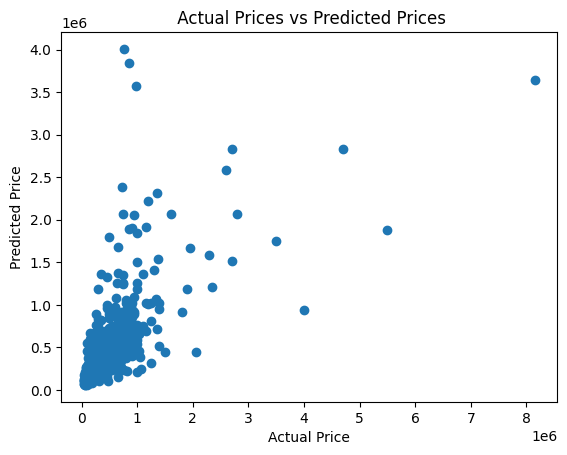

In [ ]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()